In [1]:
import os
from pandas import *
from PIL import Image, ImageFilter
from matplotlib.pyplot import *

In [2]:
file_path = "../data/images1"

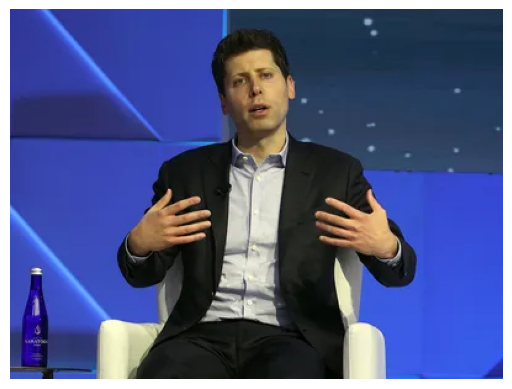

In [3]:
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Directory {file_path} not found")

image_list = os.listdir(file_path)

if len(image_list) == 0:
    raise FileNotFoundError(f"No images found in directory {file_path}")

image_path = os.path.join(file_path, image_list[0])

image = Image.open(image_path)

imshow(image)
axis("off")  # Ascunde axele pentru un aspect mai curat
show()

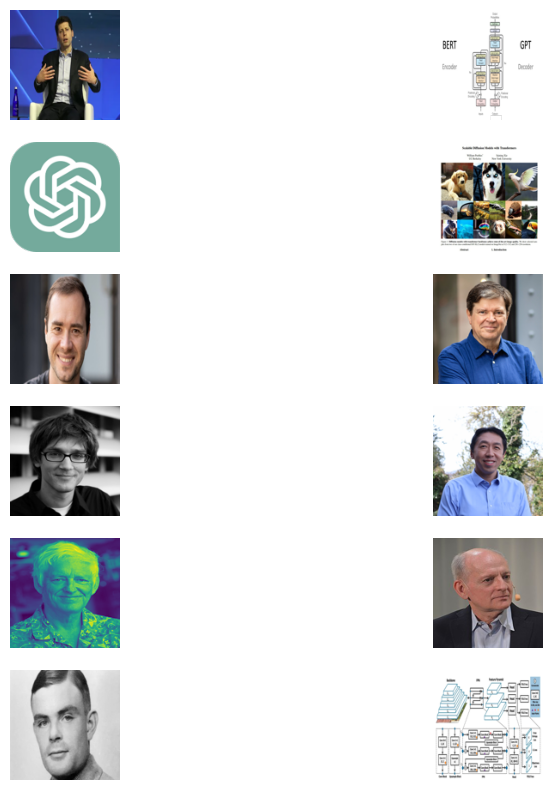

In [8]:
size = (128, 128)

redimensioned_images = []
for image in image_list:
    image_path = os.path.join(file_path, image)
    img = Image.open(image_path)
    img = img.resize(size)
    redimensioned_images.append(img)

nrImages = len(redimensioned_images)
nrColumns = 2
nrRows = (nrImages + nrColumns - 1) // nrColumns

table = DataFrame(columns=[f"Image {i+1}" for i in range (nrColumns)])

total_plots = nrRows * nrColumns
fig, ax = subplots(nrRows, nrColumns, figsize=(10, 10))

for i, image in enumerate(redimensioned_images):
    ax[i // nrColumns, i % nrColumns].imshow(image)
    ax[i // nrColumns, i % nrColumns].axis("off")

for i in range(nrImages, total_plots):
    ax[i // nrColumns, i % nrColumns].axis("off")

show()

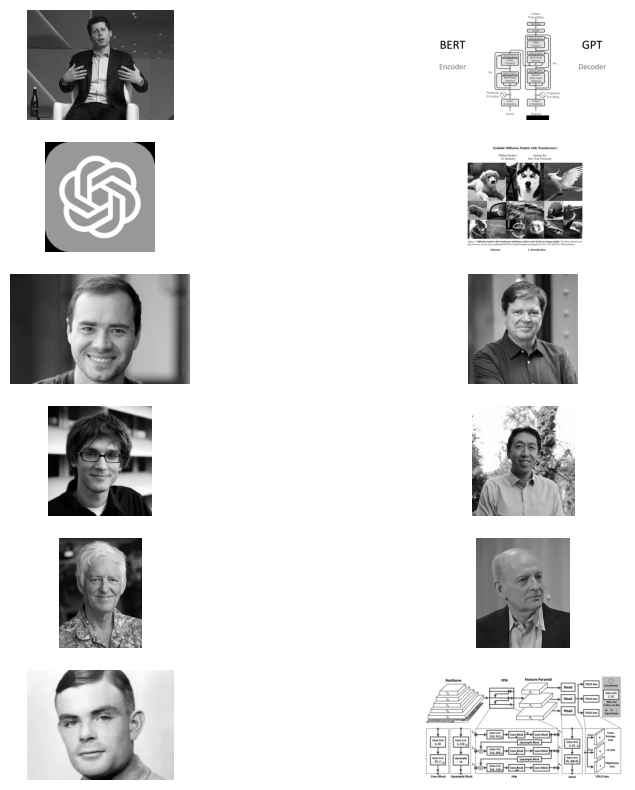

In [9]:
gray_images = []

for image in image_list:
    image_path = os.path.join(file_path, image)
    img = Image.open(image_path).convert("L")
    gray_images.append(img)

nrImages = len(gray_images)
nrColumns = 2
nrRows = (nrImages + nrColumns - 1) // nrColumns

fig, ax = subplots(nrRows, nrColumns, figsize=(10, 10))

for i, image in enumerate(gray_images):
    ax[i // nrColumns, i % nrColumns].imshow(image, cmap="gray")
    ax[i // nrColumns, i % nrColumns].axis("off")

for i in range(nrImages, nrRows * nrColumns):
    ax[i // nrColumns, i % nrColumns].axis("off")

show()

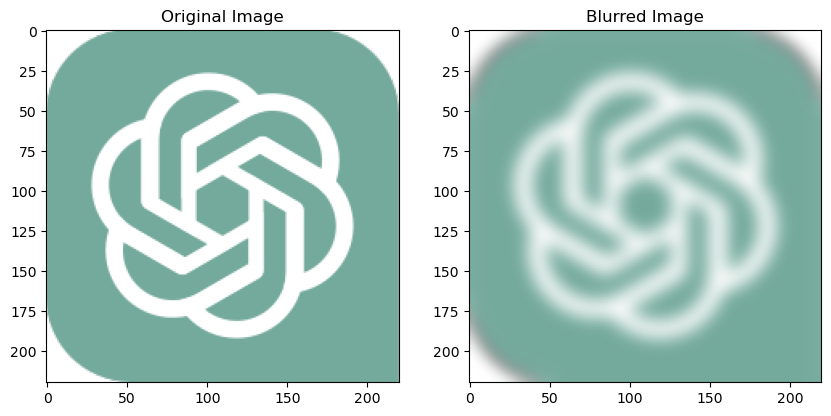

In [10]:
image = Image.open(os.path.join(file_path, image_list[2]))

blurIntensity = 5

blurred_image = image.filter(ImageFilter.GaussianBlur(blurIntensity))

fig, ax = subplots(1, 2, figsize=(10, 10))

ax[0].imshow(image)
ax[0].set_title("Original Image")

ax[1].imshow(blurred_image)
ax[1].set_title("Blurred Image")

show()

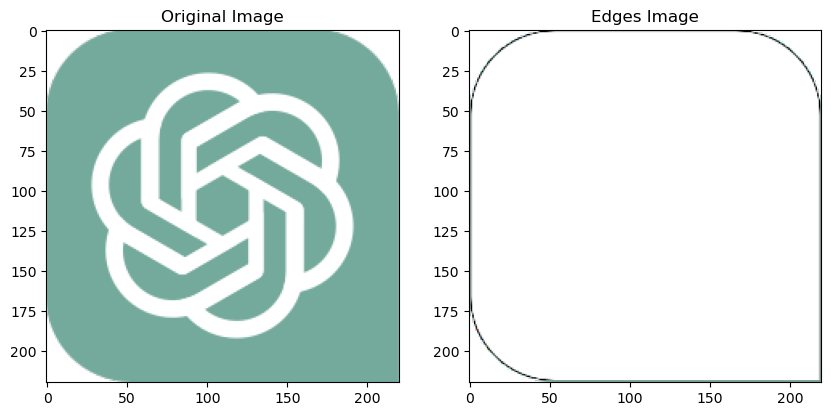

In [11]:
image = Image.open(os.path.join(file_path, image_list[2]))

edges = image.filter(ImageFilter.FIND_EDGES)

fig, ax = subplots(1, 2, figsize=(10, 10))

ax[0].imshow(image)
ax[0].set_title("Original Image")

ax[1].imshow(edges)
ax[1].set_title("Edges Image")

show()